In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
sns.set()
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# dane o zdrowiu psychicznym uczniów
# https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis
df = pd.read_csv('StressLevelDataset.csv')
# tabela zawiera 1100 obserwacji (bez braków), autorzy podzielili czynniki powodujące strs na 5 głównych faktorów,
# na który składają się 4 parametry
# Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
# Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem
# Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs',
# Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
# Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

print(df.info())

# Chciałbym zbadać zależność między jakością kształcenia (academic_performance) a obawami o przyszłą karierę
# (future_career_concerns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
df = df[['academic_performance', 'future_career_concerns']]
print(df.describe())
# Oceny uczniów mieszczą się w zakresie od 0 do 5
# Na stronie nie ma dokładnych opisów co oznaczają poszczególne oceny, przyjmuję więc, że

# dla jakości kształcenia - academic_performance:
# 0 - bardzo źle
# 1 - źle
# 2 - trochę źle
# 3 - trochę dobrze
# 4 - dobrze
# 5 - bardzo dobrze

# dla obaw o przyszłość zawodową - future_career_concerns:
# 0 - bardzo niskie
# 1 - niskie
# 2 - neutralnie ze wskazaniem na obawę 
# 3 - neutralnie ze wskazaniem na brak obaw
# 4 - wysokie
# 5 - bardzo wysokie

# Teza: im uczniowie gorzej oceniają jakość kształcenia, tym bardziej obawiają się przyszłości
# Uważam, że rozkłady 2 zmiennych będą zbliżone do rozkładu normalnego

       academic_performance  future_career_concerns
count           1100.000000             1100.000000
mean               2.772727                2.649091
std                1.414594                1.529375
min                0.000000                0.000000
25%                2.000000                1.000000
50%                2.000000                2.000000
75%                4.000000                4.000000
max                5.000000                5.000000


[]

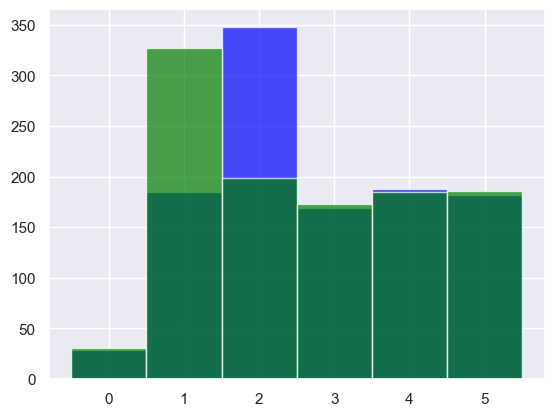

In [6]:
plt.hist(df['academic_performance'], bins=[0,1,2,3,4,5,6], alpha=0.7, align='left', color='blue')
plt.hist(df['future_career_concerns'], bins=[0,1,2,3,4,5,6], alpha=0.7, align='left', color='green')
plt.plot()

# zmienne mają podobny układ, bardzo mało odpowiedzi na 0, 3,4,5 niemal się pokrywają, różnica pojawia się w ocenach 1 i 2
# jakość nauczania najczęściej była oceniana na 2 (trochę źle)
# większość uczniów ma umiarkowane obawy wobec przyszłości

,academic_performance,future_career_concerns
academic_performance,1.000000,-0.643805
future_career_concerns,-0.643805,1.000000


<Axes: xlabel='academic_performance', ylabel='future_career_concerns'>

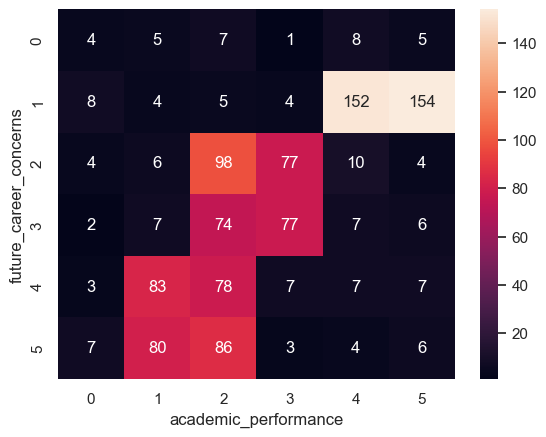

In [8]:
print(df.corr())
# Występuje silna korelacja ujemna, co może potwierdzać tezę 
sns.heatmap(pd.crosstab(df['future_career_concerns'], df['academic_performance']), annot=True, fmt='d')
plt.show()

In [9]:
# W obu zmiennych obserwacji z wynikiem 0 jest bardzo mało, usunę je, żeby nie robiły niepotrzebnego szumu
df = df.loc[df['academic_performance'] != 0]
df = df.loc[df['future_career_concerns'] != 0]

# odpowiedzi 4 i 5 mają bardzo podobny rozkład, połączę je w jedną wartość
df.loc[(df['future_career_concerns'] == 4) | (df['future_career_concerns'] == 5), 'future_career_concerns'] = 4
df.loc[(df['academic_performance'] == 4) | (df['academic_performance'] == 5), 'academic_performance'] = 4


In [10]:
# Stworzenie modelu regresji 
X = df[['academic_performance']]
y = df[['future_career_concerns']]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     future_career_concerns   R-squared:                       0.585
Model:                                OLS   Adj. R-squared:                  0.584
Method:                     Least Squares   F-statistic:                     1469.
Date:                    Tue, 21 Nov 2023   Prob (F-statistic):          2.51e-201
Time:                            17:15:56   Log-Likelihood:                -1253.3
No. Observations:                    1046   AIC:                             2511.
Df Residuals:                        1044   BIC:                             2521.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

[]

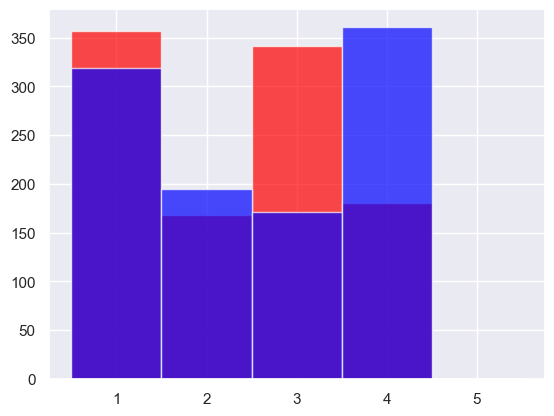

In [12]:
df['future_career_concerns_pred'] = model.predict().round()
plt.hist(df['future_career_concerns_pred'], bins=[1,2,3,4,5,6], alpha=0.7, align='left', color='red')
plt.hist(df['future_career_concerns'], bins=[1,2,3,4,5,6], alpha=0.7, align='left', color='blue')
plt.plot()

# Model ma problemy z rozróżnieniem odpowiedzi 3 (postawa neutralna wobec przyszłości ze wskazaniem na brak obaw) a 4 (duża lub bardzo duża
# obawa o przyszłość zawodową). Dobrze natomiast radzi sobie z rozpoznawaniem odpowiedzi 1 i 2 (mała lub umiarkowana obawa)

[]

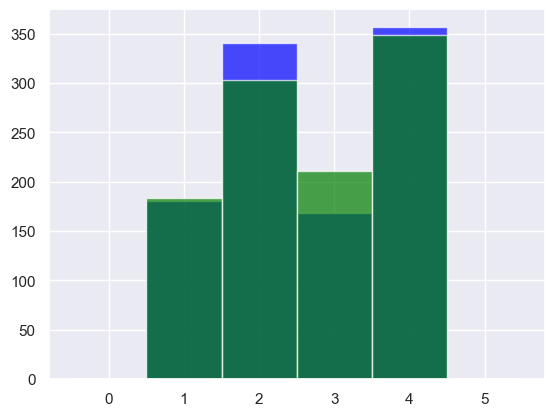

In [13]:
# Symulacja nowej tabeli na podstawie rozkładu istniejących danych

np.random.seed(42)
df['academic_performance_random'] = np.random.choice(df['academic_performance'], size=len(df['academic_performance']))

plt.hist(df['academic_performance'], bins=[0,1,2,3,4,5,6], alpha=0.7, align='left', color='blue')
plt.hist(df['academic_performance_random'], bins=[0,1,2,3,4,5,6], alpha=0.7, align='left', color='green')
plt.plot()
# Symulacja działa prawidłowo

In [42]:
# predykcja na podstawie zasymulowanych danych z rozkładu 
df['future_career_concerns_pred_random'] = round(model.params['const'] + df['academic_performance_random'] * model.params['academic_performance'])